In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
ds = np.load('./data/train_pifpaf_v1.npy')

In [75]:
ds.shape

(9767097, 13)

In [76]:
appliances, aggregate = ds[:, :8], ds[:, 8:]

In [77]:
aggregate.shape

(9767097, 5)

In [78]:
appliances.shape

(9767097, 8)

In [79]:
np.max(aggregate, axis=(0,1))

1102310.0

In [80]:
appliances[appliances < 0] = 0

In [81]:
min_max_agg = np.max(aggregate, axis=(0,1), keepdims=True) - np.min(aggregate, axis=(0,1), keepdims=True)

In [82]:
minmax_app = np.max(appliances, axis=(0,1), keepdims=True) - np.min(appliances, axis=(0,1), keepdims=True)

In [83]:
norm_aggregate = (aggregate - np.min(aggregate, axis=(0,1), keepdims=True)) / min_max_agg
norm_appliances = (appliances - np.min(appliances, axis=(0,1), keepdims=True)) / minmax_app

In [84]:
norm_appliances = np.reshape(norm_appliances[:1024 * (norm_appliances.shape[0] // 1024), :], [-1, 1024, 8])

In [85]:
norm_aggregate = np.reshape(norm_aggregate[:1024 * (norm_aggregate.shape[0] // 1024), :], [-1, 1024, 5])

In [86]:
norm_appliances.shape

(9538, 1024, 8)

In [87]:
norm_aggregate.shape

(9538, 1024, 5)

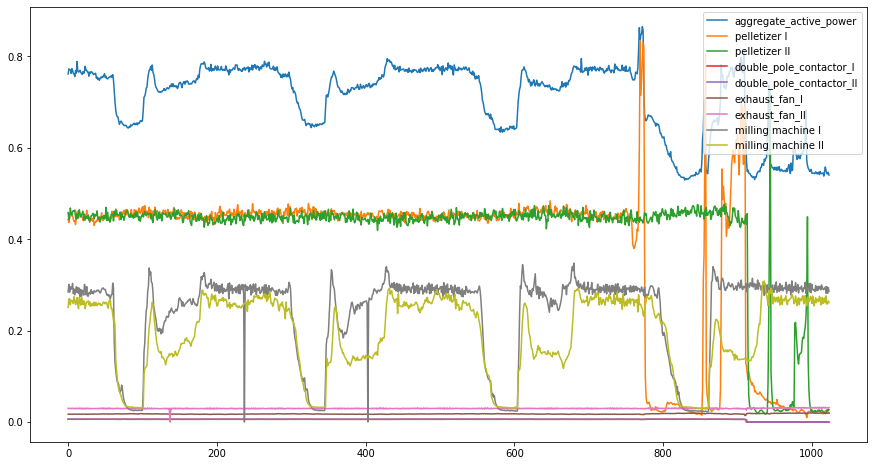

In [95]:
i = -400
plt.figure(figsize=[15, 8])
plt.plot(np.reshape(norm_aggregate[i, :, 0], -1) , label='aggregate_active_power')
plt.plot(np.reshape(norm_appliances[i, :, 0], -1), label='pelletizer I')
plt.plot(np.reshape(norm_appliances[i, :, 1], -1), label='pelletizer II')
plt.plot(np.reshape(norm_appliances[i, :, 2], -1), label='double_pole_contactor_I')
plt.plot(np.reshape(norm_appliances[i, :, 3], -1), label='double_pole_contactor_II')
plt.plot(np.reshape(norm_appliances[i, :, 4], -1), label='exhaust_fan_I')
plt.plot(np.reshape(norm_appliances[i, :, 5], -1), label='exhaust_fan_II')
plt.plot(np.reshape(norm_appliances[i, :, 6], -1), label='milling machine I')
plt.plot(np.reshape(norm_appliances[i, :, 7], -1), label='milling machine II')
plt.legend()
plt.show()

In [96]:
appliances = np.reshape(appliances[:1024 * (appliances.shape[0] // 1024), :], [-1, 1024, 8])

In [97]:
aggregate = np.reshape(aggregate[:1024 * (aggregate.shape[0] // 1024), :], [-1, 1024, 5])

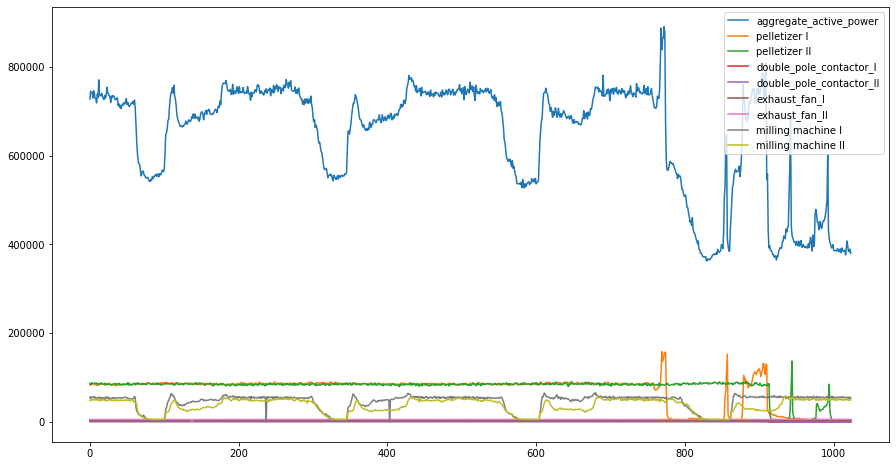

In [98]:
i = -400
plt.figure(figsize=[15, 8])
plt.plot(np.reshape(aggregate[i, :, 0], -1) , label='aggregate_active_power')
plt.plot(np.reshape(appliances[i, :, 0], -1), label='pelletizer I')
plt.plot(np.reshape(appliances[i, :, 1], -1), label='pelletizer II')
plt.plot(np.reshape(appliances[i, :, 2], -1), label='double_pole_contactor_I')
plt.plot(np.reshape(appliances[i, :, 3], -1), label='double_pole_contactor_II')
plt.plot(np.reshape(appliances[i, :, 4], -1), label='exhaust_fan_I')
plt.plot(np.reshape(appliances[i, :, 5], -1), label='exhaust_fan_II')
plt.plot(np.reshape(appliances[i, :, 6], -1), label='milling machine I')
plt.plot(np.reshape(appliances[i, :, 7], -1), label='milling machine II')
plt.legend()
plt.show()